In [1]:
import os, pandas as pd 
import numpy as np
from scipy import stats 
import time
from datetime import datetime
import pickle
print(os.getcwd())
from collections import Counter
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

/Users/gaojiejun/Sheffield/_00_Dissertation/Code/TRN-pytorch-master


In [2]:
train= pd.read_pickle('../../epic/data/processed/train_labels.pkl')
test_seen= pd.read_pickle('../../epic/data/processed/test_seen_labels.pkl')
test_unseen= pd.read_pickle('../../epic/data/processed/test_unseen_labels.pkl')
train[train.video_id=='P08_13'][:2]
# test_seen[:2]
# test_unseen[:2]
print(len(train))
print(len(np.unique(train.narration)))

28472
8793


In [3]:

train[:50]
fn= train.stop_frame- train.start_frame
fn.describe()

count    28472.000000
mean       224.640910
std        338.308508
min         30.000000
25%         69.000000
50%        116.000000
75%        240.000000
max      12420.000000
dtype: float64

In [41]:
def read_pickle(pkl):
    a= pd.read_pickle(pkl)
    a.columns= ['participant_id', 'video_id', 'narration', 'start_timestamp',
       'stop_timestamp', 'start_frame', 'stop_frame', 'verb', 'verb_class',
       'noun', 'noun_class', 'all_nouns', 'all_noun_classes','frame_num']
    return a 

xy_train= read_pickle('../LXY_reepickitchens/train.pkl')
xy_test= read_pickle('../LXY_reepickitchens/test.pkl')
xy_val= read_pickle('../LXY_reepickitchens/val.pkl')
xy_val[:2]


idx=[0,2,3]
df= xy_test[(xy_test.video_id=='P22_14')]
df[df.index==2]

# df.iloc[0]
fn= xy_train.stop_frame- xy_train.start_frame
xy_train.frame_num.describe()
fn.describe()
print(xy_train.shape)
print(xy_test.shape)
print(xy_val.shape)
# xy_test.columns

(4762, 14)
(1587, 14)
(1586, 14)


In [5]:
xy_train[xy_train.video_id=='P08_25']



,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes,frame_num
904,P08,P08_25,get kitchen towel,00:00:13.65,00:00:15.62,819,937,get,0,towel:kitchen,66,[towel:kitchen],[66],118
955,P08,P08_25,get plate,00:00:01.08,00:00:03.24,64,194,get,0,plate,4,[plate],[4],130
1055,P08,P08_25,get bowl,00:00:07.56,00:00:10.33,453,619,get,0,bowl,6,[bowl],[6],166
2761,P08,P08_25,open dishwasher,00:00:05.05,00:00:06.12,303,367,open,2,dishwasher,49,[dishwasher],[49],64
3662,P08,P08_25,wipe off,00:00:17.71,00:00:19.22,1062,1153,wipe-off,4,towel:kitchen,66,[towel:kitchen],[66],91


In [45]:
cols = ['verb_class']
xy_val[cols].groupby(cols).size()

verb_dict=pd.read_csv( r'./epic_kitchens/EPIC_verb_classes.csv')
verb_dict[:8]

,verb_id,class_key,verbs
0,0,take,"['take', 'grab', 'pick', 'draw', 'get', 'grab-..."
1,1,put,"['put', 'pose', 'put-away', 'place-that', 'pla..."
2,2,open,"['open', 'unzip', 'open-up']"
3,3,close,"['close', 'close-off', 'shut']"
4,4,wash,"['wash', 'sponge', 'lather', 'wash-with', 'rin..."
5,5,cut,"['cut', 'chop', 'chop-off', 'cut-off', 'slice-..."
6,6,mix,"['mix', 'beat', 'mix-around', 'stir-with', 'wh..."
7,7,pour,"['pour', 'pour-in', 'tip-in', 'pour-out', 'pou..."


In [151]:
# len(verb_class)


verb_class= xy_train[cols].groupby(cols).size()
pd.DataFrame(verb_class).join(verb_dict)
isinstance(verb_class, pd.Series)
ds= pd.DataFrame(verb_class).join(verb_dict)
ds



,0,verb_id,class_key,verbs
verb_class,,,,
0,1233,0,take,"['take', 'grab', 'pick', 'draw', 'get', 'grab-..."
1,1318,1,put,"['put', 'pose', 'put-away', 'place-that', 'pla..."
2,556,2,open,"['open', 'unzip', 'open-up']"
3,425,3,close,"['close', 'close-off', 'shut']"
4,797,4,wash,"['wash', 'sponge', 'lather', 'wash-with', 'rin..."
5,162,5,cut,"['cut', 'chop', 'chop-off', 'cut-off', 'slice-..."
6,125,6,mix,"['mix', 'beat', 'mix-around', 'stir-with', 'wh..."
7,146,7,pour,"['pour', 'pour-in', 'tip-in', 'pour-out', 'pou..."


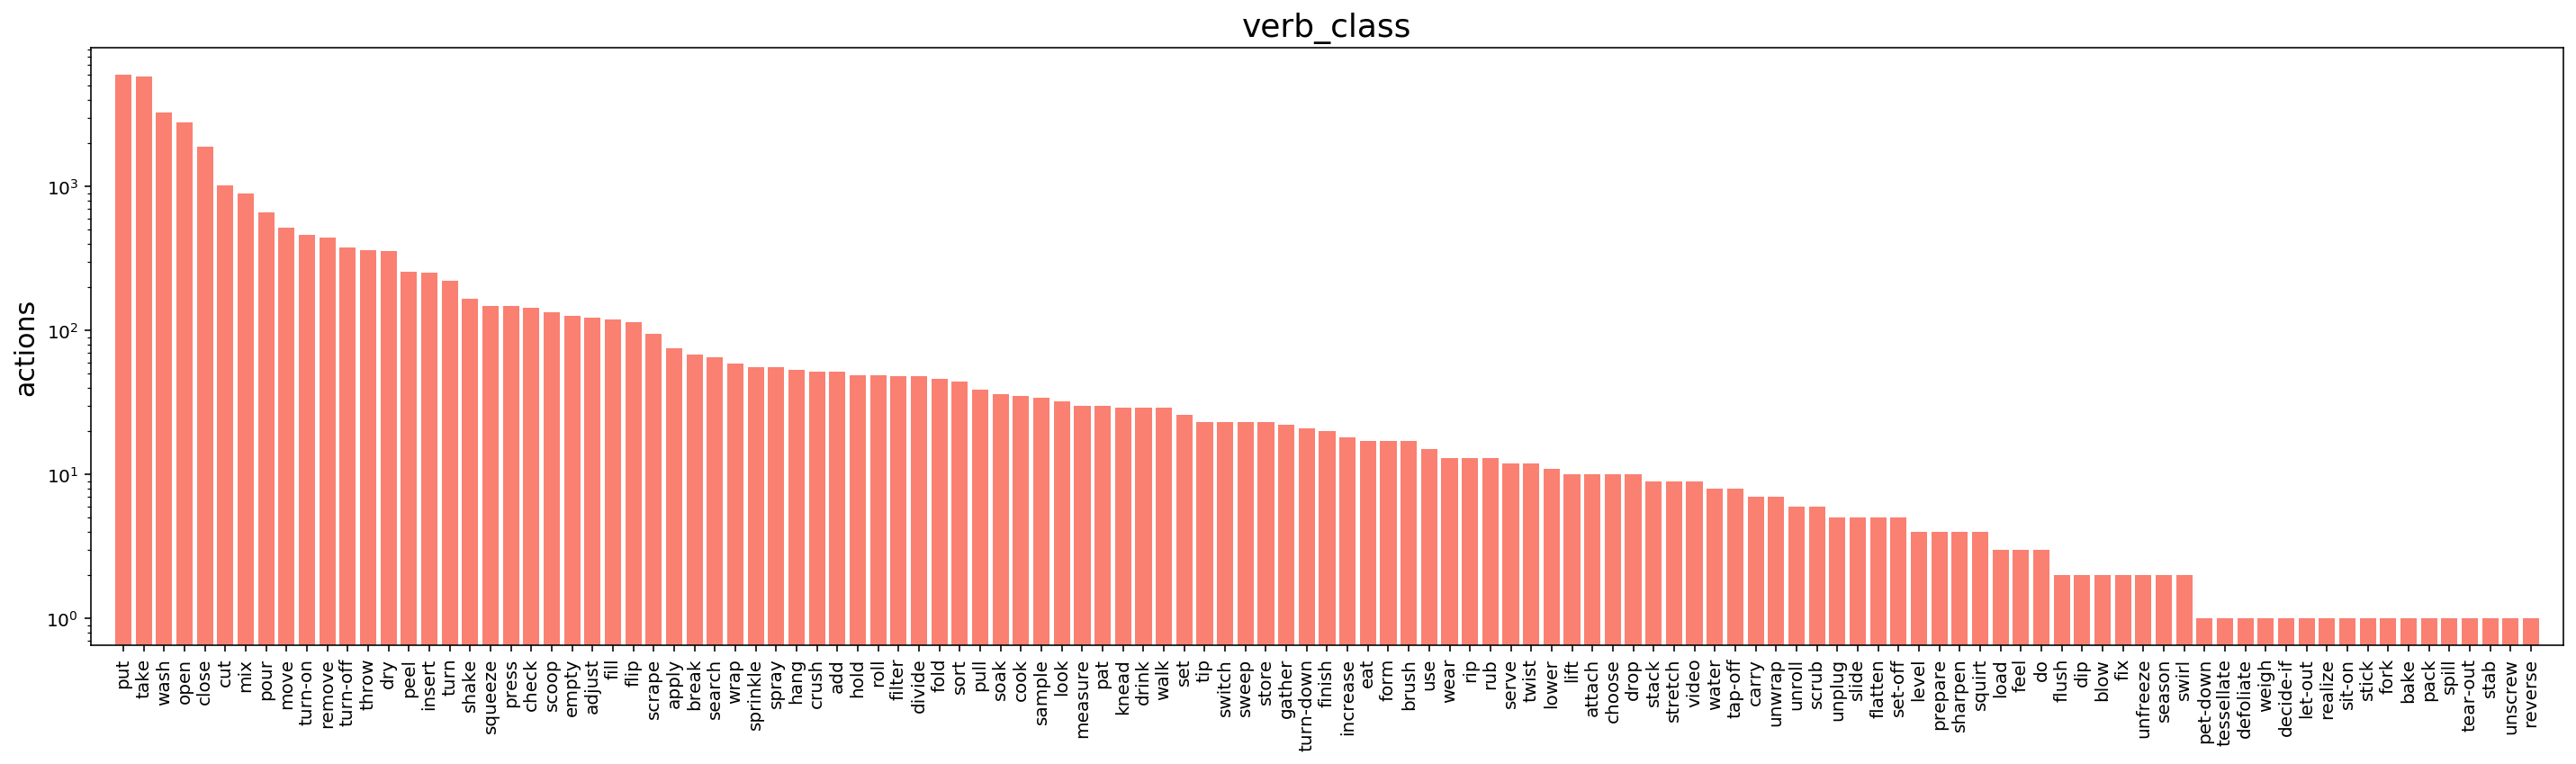

In [149]:
verb_class= train[cols].groupby(cols).size()

def bar_graph( ds, index_col= None, bar_col= None,
              plotname='verb_class', colors=['salmon'], xlabel='', ylabel='actions', 
              save_as_pdf=''):
    ''' ds is a single column of a pd.dataframe. or a Series.'''
    
    index= np.arange( len(ds))
    my_colrs= colors
    if isinstance(ds, pd.Series) or len(ds.columns)==1 : 
        x_ticks= ds.index
        bar_col= ds 
    else: 
        x_ticks = ds[index_col]
        bar_col= ds[bar_col]
        
    if len(colors)==1 : my_colrs = colors* (len(ds))
    
    
    plt.bar(index, bar_col ,#width=1/2, 
            color= my_colrs)

    plt.yscale('log')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15) 
    plt.xticks(index, x_ticks, fontsize=10, rotation=90,ha="center")
#     plt.ylim(0 , 0.3)#  
    plt.title(plotname, fontsize=18)
    plt.tight_layout()
    if save_as_pdf: plt.savefig(save_as_pdf, format='pdf')
    plt.show()
    plt.close()

plt.rcParams["figure.figsize"] = (20,6) # the canvas inches
plt.margins(x=0.01)# to contron the margin sapce inside the border.
ds= pd.DataFrame(verb_class).join(verb_dict)
ds.columns =['cnt']+ list(ds.columns[1:])
ds= ds.sort_values(['cnt'], ascending=[False])
bar_graph(ds, index_col='class_key', bar_col='cnt',
         save_as_pdf='../../deliverable/Figure/verb_class.pdf')

verb_class
0    411
1    439
2    185
3    142
4    266
5     54
6     41
7     48
dtype: int64

In [6]:
type(train.start_timestamp[0])
xy_train['stop']=pd.to_datetime(xy_train.stop_timestamp)
xy_train['start']=pd.to_datetime(xy_train.start_timestamp)
xy_train['duration']= xy_train['stop']- xy_train['start']
xy_train.duration


0      00:00:00.500000
1      00:00:00.500000
2      00:00:00.500000
3      00:00:00.510000
4      00:00:00.500000
5      00:00:00.520000
6      00:00:00.520000
7      00:00:00.510000
8      00:00:00.530000
9      00:00:00.540000
10     00:00:00.540000
11     00:00:00.560000
12     00:00:00.550000
13     00:00:00.560000
14     00:00:00.550000
15     00:00:00.560000
16     00:00:00.560000
17     00:00:00.580000
18     00:00:00.560000
19     00:00:00.570000
20     00:00:00.590000
21     00:00:00.570000
22     00:00:00.590000
23     00:00:00.610000
24     00:00:00.600000
25     00:00:00.590000
26     00:00:00.610000
27     00:00:00.600000
28     00:00:00.600000
29     00:00:00.600000
             ...      
4732   00:00:07.310000
4733   00:00:07.560000
4734   00:00:07.580000
4735   00:00:07.630000
4736   00:00:07.630000
4737   00:00:07.660000
4738   00:00:07.750000
4739   00:00:07.820000
4740   00:00:07.860000
4741   00:00:08.460000
4742   00:00:08.510000
4743   00:00:08.540000
4744   00:0

In [78]:
train.frames.describe()

count    28472.000000
mean       225.640910
std        338.308508
min         31.000000
25%         70.000000
50%        117.000000
75%        241.000000
max      12421.000000
Name: frames, dtype: float64

In [77]:
train.duration.describe()

count                     28472
mean     0 days 00:00:03.744090
std      0 days 00:00:05.638492
min      0 days 00:00:00.500000
25%      0 days 00:00:01.150000
50%      0 days 00:00:01.930000
75%             0 days 00:00:04
max             0 days 00:03:27
Name: duration, dtype: object

In [196]:

def bar_group(ds,  bars_cols=None,index_col=None, xlabel='',ylabel='', ylims=None,
    plotname='Fig.Name',colors=0, alpha=1, lagend_lbls=None, xtick_rotation=0, save_as_pdf=''):
    '''
    plot a grouped bar chart
    bars_cols= ['col1','col2']
    index_col= 'col_index'
    '''
    N= len(ds) 
    if not bars_cols: bars_cols= ds.columns
    if not lagend_lbls: lagend_lbls= bars_cols
    grps= len(bars_cols)
    index = ds[index_col] if index_col else ds.index 
    barWidth = 1/(grps+1)   # if group of n, then the barWidth = 1/(n+1)
    for i, col in enumerate(bars_cols):
        r= [x + barWidth*i for x in range(N)]
        bars= ds[col]
        if colors:
            plt.bar(r, bars,width=barWidth, edgecolor='white', label=lagend_lbls[i], color=colors[i], alpha= alpha)
        else:
            plt.bar(r, bars,width=barWidth, edgecolor='white', label=lagend_lbls[i], alpha= alpha) 
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(ticks= [r + (0.5-barWidth) for r in range(N)], labels=index,fontsize=8, rotation=xtick_rotation,ha="center")
    if ylims and len(ylims)==2: plt.ylim(ylims)
    plt.legend()# legend(bbox_to_anchor=(1, 1)) #right top.
    plt.title(plotname)
    plt.tight_layout() 
    if save_as_pdf:
        plt.savefig(save_as_pdf, format='pdf')
    plt.show()


In [107]:
import datetime

x = train.duration[990]
print( x)
x.total_seconds()

0 days 00:00:02.300000


2.3

In [185]:
bins= 1
def process(duration_col):
    x= duration_col
    x= [np.ceil(i.total_seconds()/bins) for i in x]
    x= Counter(x)
    x=pd.DataFrame.from_dict(x, orient='index', columns=['freqs'])#.reset_index()#= [i/sum(x) for i in x]
    x['f']= x.freqs/x.freqs.sum()
    return x 
# dur_xy= x
dur= process(train.duration)
dur_xy= process(xy_train.duration)
# dur_xy

In [211]:
train.duration.describe()

count                     28472
mean     0 days 00:00:03.744090
std      0 days 00:00:05.638492
min      0 days 00:00:00.500000
25%      0 days 00:00:01.150000
50%      0 days 00:00:01.930000
75%             0 days 00:00:04
max             0 days 00:03:27
Name: duration, dtype: object

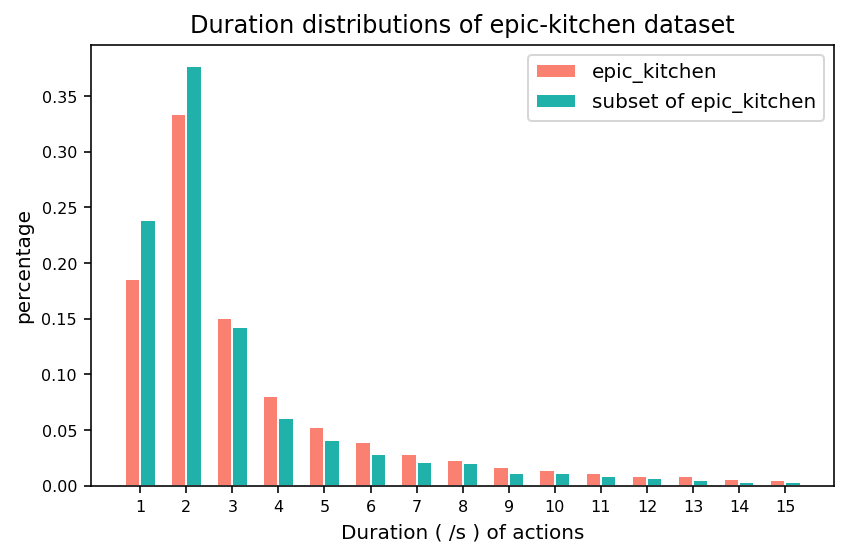

In [207]:

# dur_xy#.append(dur_xy)
dur_m= pd.concat([dur, dur_xy] , axis=1)
dur_m.columns=['freqs', 'f','xy_freqs', 'xy_f']
dur_m['index']= dur_m.index*bins
dur_m['index']= dur_m['index'].astype(int)

# dur_m[:20]
bar_group(dur_m[:15], bars_cols=['f','xy_f'],index_col='index', colors=['salmon','lightseagreen'],
          lagend_lbls=['epic_kitchen','subset of epic_kitchen'], 
          xlabel='Duration ( /s ) of actions', ylabel='percentage',
         plotname= 'Duration distributions of epic-kitchen dataset',
         save_as_pdf='../../deliverable/Figure/Duration Distribution.pdf')

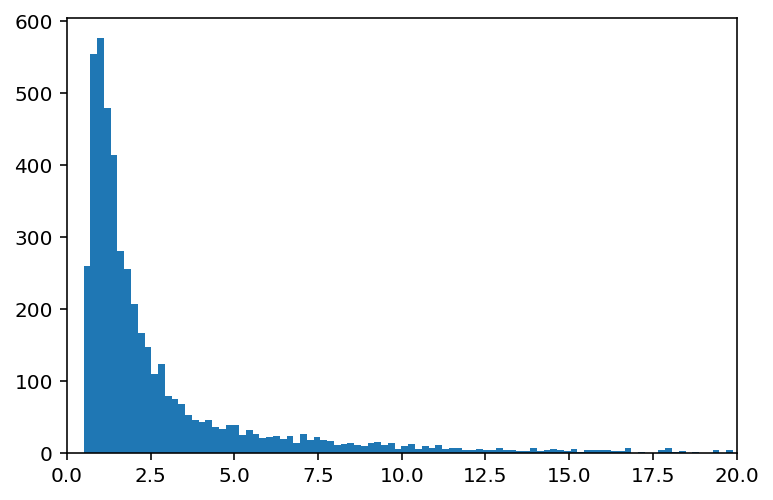

In [130]:
x= xy_train.duration
x= [i.total_seconds() for i in x]
plt.hist(x, bins= 200)

# plt.hist(claims['Claim_Amount'],bins = 200)
# plt.title('Histogram of non-zero Claim_Amount')
plt.xlim([0,20])
# plt.xlabel('claim amount(truncate 3000+)')
# plt.ylabel('frequency')
plt.show()
# plt.savefig(os.path.join(savedir,'Q2_1_claim_amt.pdf'), format='pdf')
plt.close()

In [45]:
# xy_train/ train
print(len(sorted(xy_train.verb_class.unique()) )) # 8
print(len(sorted(train.noun_class.unique()) )) # 119

train['verb_class'].unique()
Counter(xy_train.verb_class)

8
321


Counter({0: 1233, 1: 1318, 2: 556, 3: 425, 4: 797, 5: 162, 6: 125, 7: 146})

In [46]:
# os.path.join(os.getcwd(), 'frames')

In [48]:

# method provided by Xianyuan. same as pd.read_pickle
# with open('../Code/LXY_reepickitchens/train.pkl', 'rb') as file:
#     file = pickle.load(file)
#     for line in file.values:
#         print(line)

In [50]:
print(train.shape)
print(test_seen.shape)
print(test_unseen.shape) # 39445 totally
test_seen.index

(28472, 13)
(8047, 6)
(2929, 6)


Int64Index([ 1924,  1925,  1926,  1927,  1928,  1929,  1930,  1931,  1932,
             1933,
            ...
            39137, 39138, 39139, 39140, 39141, 39142, 39143, 39144, 39145,
            39146],
           dtype='int64', name='uid', length=8047)

In [51]:
stats.describe(uid)

NameError: name 'uid' is not defined

In [52]:
u1,u2,u3=np.array(train.index), np.array(test_unseen.index), np.array(test_seen.index)
uid= np.hstack((u1,u2,u3))
print(len(uid))
print(len(np.unique(uid)) )
stats.describe(uid)

x= np.arange(39563)
y= [ i for i in x if i not in uid]
len(y)

39448
39448


116

In [53]:
train.iloc[0]

participant_id              P01
video_id                 P01_01
narration             open door
start_timestamp     00:00:00.14
stop_timestamp      00:00:03.37
start_frame                   8
stop_frame                  202
verb                       open
verb_class                    2
noun                       door
noun_class                    8
all_nouns                [door]
all_noun_classes            [8]
Name: 0, dtype: object

In [54]:
test_seen.iloc[0]  
# ##lack of 7 columns:
# narration             open door
# verb                       open
# verb_class                    2
# noun                       door
# noun_class                    8
# all_nouns                [door]
# all_noun_classes            [8]

participant_id             P01
video_id                P01_11
start_timestamp    00:00:00.00
stop_timestamp     00:00:01.89
start_frame                  1
stop_frame                 113
Name: 1924, dtype: object

In [55]:
test_seen.head(1)

,participant_id,video_id,start_timestamp,stop_timestamp,start_frame,stop_frame
uid,,,,,,
1924,P01,P01_11,00:00:00.00,00:00:01.89,1,113


In [56]:
t= train 
train['duration']= pd.to_timedelta(t['stop_timestamp'])- pd.to_timedelta(t['start_timestamp'])
train['frames']= t['stop_frame']-t['start_frame']+1
train.head(5)


,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes,duration,frames
uid,,,,,,,,,,,,,,,
0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2,door,8,[door],[8],00:00:03.230000,195
1,P01,P01_01,turn on light,00:00:04.37,00:00:06.17,262,370,turn-on,12,light,113,[light],[113],00:00:01.800000,109
2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3,door,8,[door],[8],00:00:02.510000,152
3,P01,P01_01,open fridge,00:00:12.77,00:00:13.99,766,839,open,2,fridge,10,[fridge],[10],00:00:01.220000,74
4,P01,P01_01,take celery,00:00:15.25,00:00:16.40,915,983,take,0,celery,185,[celery],[185],00:00:01.150000,69


In [57]:
ds= train#.head(5)
# print(ds)
x= summary(ds)

x
# df= pd.DataFrame()
# for c in ['verb','verb_class','noun','noun_class','narration']:
#     temp= pd.Series(ds[[c]].groupby(c).size().count())
# #     print(type(temp))
#     df[c]= temp
# for c in ['duration','frames']:
#     temp= pd.Series(ds[c].sum()) # sum of a pd.Series. ds[[c]].sum() = sum of a df
# #     print(type(temp))
#     df[c]= temp
# # # for c in ['verb','verb_class','noun','noun_class','narration']:
# # c= 'frames'
# # df[c]=pd.Series(ds[[c]].sum())
# # # type(ds[[c]].sum())
# # # df[c]= ds[[c]].groupby(c).size().shape
# df

NameError: name 'summary' is not defined

In [58]:
def summary(dataset, name='total'):
    ds= dataset.copy()
    ds['duration']= pd.to_timedelta(ds['stop_timestamp'])- pd.to_timedelta(ds['start_timestamp'])
    ds['frames']= ds['stop_frame']-ds['start_frame']+1
    df= pd.DataFrame()
    df['uid']= pd.Series(ds['participant_id'].count())
    # count
    for c in ['video_id']:
        if c not in ds.columns: continue
        temp= pd.Series(ds[[c]].groupby(c).size().count())
        df[c]= temp
    # distinct 
    for c in ['verb','verb_class','noun','noun_class','narration']:
        if c not in ds.columns: continue
        temp= pd.Series(ds[[c]].groupby(c).size().count())
        #print(type(temp))
        df[c]= temp
    #sum 
    for c in ['duration','frames']:
        if c not in ds.columns: continue
        temp= pd.Series(ds[c].sum()) # sum of a pd.Series. ds[[c]].sum() = sum of a df
        #print(c,type(temp))
        df[c]= temp
    df.index= [name]
    return df 

summary(train)

,uid,video_id,verb,verb_class,noun,noun_class,narration,duration,frames
total,28472,272,411,119,1047,321,8793,1 days 05:36:41.740000,6424448


In [59]:
summary(test_seen)

,uid,video_id,duration,frames
total,8047,106,08:10:01.090000,1772068


In [60]:
summary(test_unseen)

,uid,video_id,duration,frames
total,2929,54,02:53:03.090000,625922


In [61]:
# participant --- video_num 
# dataset: train 
ds= train

p_group= pd.DataFrame()
p_group['uid']= ds.groupby(['participant_id']).size()
g1= ds[np.array(('participant_id','video_id'))].drop_duplicates().groupby('participant_id').size()
p_group['video_id']=g1
# ##participant--  verbs-- noun ----actions
for c in ['verb','verb_class','noun','noun_class','narration']:
    p_group[c]= ds[np.array(('participant_id',c))].drop_duplicates().groupby('participant_id').size()

for c in ['duration','frames']:
    p_group[c]= ds[np.array(('participant_id',c))].groupby('participant_id').sum()

p= p_group

subset= ['P01','P08','P22']
p= p_group.loc[subset]

tt= summary(ds,'total')
idx= [p in set(subset) for p in ds['participant_id']]
sbs= summary(ds.loc[idx],'subset_1_8_22')

p.append([sbs,tt])



,uid,video_id,verb,verb_class,noun,noun_class,narration,duration,frames
P01,3090,14,72,49,159,107,900,0 days 03:08:17.240000,680905
P08,2032,22,107,54,224,125,1041,0 days 02:01:20.550000,438857
P22,4823,13,96,49,211,122,1256,0 days 03:02:39.160000,662366
subset_1_8_22,9945,49,190,78,434,199,2925,0 days 08:12:16.950000,1782128
total,28472,272,411,119,1047,321,8793,1 days 05:36:41.740000,6424448


In [62]:
# total= p.sum()
# total.name='total-dataset'
# print(type(total))
# p.append(total)

In [67]:
s_train= pd.read_pickle('epic_kitchens/train.pkl')
s_test= pd.read_pickle('epic_kitchens/test.pkl')
s_vld= pd.read_pickle('epic_kitchens/val.pkl')



In [72]:
len(s_train)

4762

In [68]:
cols= train.columns.append(pd.Index(['frames']))
s_train.columns= cols
s_test.columns= cols
s_vld.columns= cols
# dt.columns

ValueError: Length mismatch: Expected axis has 14 elements, new values have 16 elements

In [65]:
ss= s_train.append([s_test,s_vld])

print(summary(s_train,'train'))
print(summary(s_test,'test'))
print(summary(s_vld,'vld'))

(summary(ss,'subset 1-8-22'))

NameError: name 's_train' is not defined

# --

In [735]:
# # same as train, test_seen ,test_unseen

# meta_test1= pd.read_pickle('../../epic/data/raw/EPIC_test_s1_timestamps.pkl')
# meta_test2= pd.read_pickle('../../epic/data/raw/EPIC_test_s2_timestamps.pkl')
# meta_train_action= pd.read_pickle('../../epic/data./data/raw/EPIC_train_action_labels.pkl')

# print(meta_test1.shape)
# print(meta_test2.shape)
# print(meta_train_action.shape)

train_labels= pd.read_pickle('../annotations-master/EPIC_train_action_labels.pkl')


In [736]:
train_labels.shape

(28472, 13)

In [739]:
idx1= [p in set(subset) for p in train_labels['participant_id']]
print(train_labels[idx1].shape)
train_labels[idx1].head(5)


(9945, 13)


,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
uid,,,,,,,,,,,,,
0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2,door,8,[door],[8]
1,P01,P01_01,turn on light,00:00:04.37,00:00:06.17,262,370,turn-on,12,light,113,[light],[113]
2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3,door,8,[door],[8]
3,P01,P01_01,open fridge,00:00:12.77,00:00:13.99,766,839,open,2,fridge,10,[fridge],[10]
4,P01,P01_01,take celery,00:00:15.25,00:00:16.40,915,983,take,0,celery,185,[celery],[185]
